## First Phase (EDA on small sample to get general insight)
#### Created by: Mehdi Ghane
#### Date: April 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_excel('In store Transactions Sample.xlsx', sheet_name='Transactions')

In [372]:
df.head(3)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,STORE_FORMAT,STORE_REGION,TOTAL_PRICE,MONTH,DAY,InvoiceDate,CohortDate,Cohort_Index,invoice_week,cohort_week
0,200801,2008-02-27,4,21,1,1.83,PRD0900159,CL00029,DEP00008,G00004,...,LS,E02,1.83,2,27,2008-02-01,2008-02-01,1.0,9,9.0
1,200801,2008-02-27,4,21,1,0.86,PRD0900531,CL00026,DEP00008,G00004,...,LS,E02,0.86,2,27,2008-02-01,2008-02-01,1.0,9,9.0
2,200801,2008-02-26,3,16,1,1.12,PRD0900925,CL00035,DEP00009,G00004,...,LS,E02,1.12,2,26,2008-02-01,NaT,NaN,9,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80661 entries, 0 to 80660
Data columns (total 23 columns):
SHOP_WEEK                   80661 non-null int64
SHOP_DATE                   80661 non-null int64
SHOP_WEEKDAY                80661 non-null int64
SHOP_HOUR                   80661 non-null int64
QUANTITY                    80661 non-null int64
SPEND                       80661 non-null float64
PROD_CODE                   80661 non-null object
PROD_CODE_10                80661 non-null object
PROD_CODE_20                80661 non-null object
PROD_CODE_30                80661 non-null object
PROD_CODE_40                80661 non-null object
CUST_CODE                   64984 non-null object
CUST_PRICE_SENSITIVITY      64984 non-null object
CUST_LIFESTAGE              57917 non-null object
BASKET_ID                   80661 non-null int64
BASKET_SIZE                 80661 non-null object
BASKET_PRICE_SENSITIVITY    80661 non-null object
BASKET_TYPE                 80661 non-null obj

**Calculate Total Purchase**

In [4]:
df['TOTAL_PRICE']=df['QUANTITY']*df['SPEND']

In [10]:
df.describe()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID,TOTAL_PRICE
count,80661.000000,8.066100e+04,80661.000000,80661.000000,80661.000000,80661.000000,8.066100e+04,80661.000000
mean,200802.004624,2.008029e+07,3.979073,14.858879,1.593620,1.960677,9.941100e+14,4.349692
std,0.813637,3.481709e+01,1.993215,3.670340,1.884405,2.892889,8.136288e+07,28.322846
min,200801.000000,2.008022e+07,1.000000,8.000000,1.000000,0.010000,9.941099e+14,0.010000
25%,200801.000000,2.008030e+07,2.000000,12.000000,1.000000,0.780000,9.941099e+14,0.810000
50%,200802.000000,2.008031e+07,4.000000,15.000000,1.000000,1.250000,9.941100e+14,1.350000
75%,200803.000000,2.008031e+07,6.000000,18.000000,1.000000,2.120000,9.941101e+14,2.550000
max,200803.000000,2.008032e+07,7.000000,21.000000,107.000000,184.800000,9.941101e+14,3951.360000


**Total Revenue and it's 80%**

*It is believed that 80% of revenue comes from 20% of customers. However, analysis of cummulative profits generated by customers proves it wrong for this specific case, probability due to limited data from a timeframe of only 3 weeks.*

In [5]:
df['TOTAL_PRICE'].sum()

350850.51

In [6]:
df['SHOP_DATE']=df['SHOP_DATE'].apply(lambda x: dt.datetime.strptime(str(x), '%Y%m%d'))

In [7]:
df['MONTH']=df['SHOP_DATE'].apply(lambda x: x.month)
df['DAY']=df['SHOP_DATE'].apply(lambda x: x.day)

In [8]:
df['CUST_CODE'].nunique()

2626

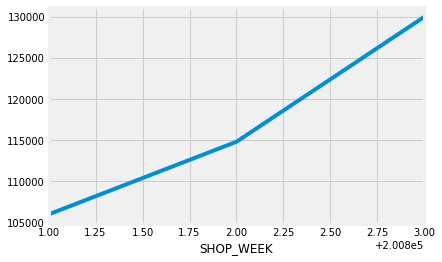

In [16]:
df.groupby('SHOP_WEEK').sum()['TOTAL_PRICE'].plot()

Text(0.5, 0, 'Purchase Week')

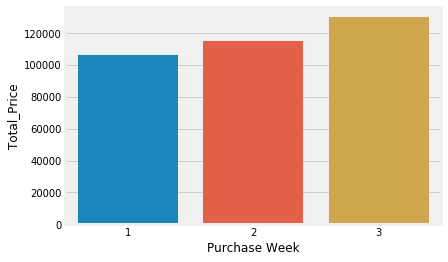

In [17]:
sns.barplot(x=[1,2,3], y=df.groupby('SHOP_WEEK').sum()['TOTAL_PRICE'])
plt.ylabel('Total_Price')
plt.xlabel('Purchase Week')

In [9]:
pivot_weekly=df.pivot_table(index='CUST_CODE', columns='SHOP_WEEK', values='TOTAL_PRICE', aggfunc='sum')

**Those customer whose purchase has been increased every week**

In [10]:
pivot_weekly[(pivot_weekly[200801]<pivot_weekly[200802]) & (pivot_weekly[200802]<pivot_weekly[200803])]

SHOP_WEEK,200801,200802,200803
CUST_CODE,,,
CUST0000001392,25.32,27.68,32.80
CUST0000001437,0.85,1.89,27.59
CUST0000003447,24.11,64.08,74.72
CUST0000007046,19.42,27.31,48.86
CUST0000007988,0.98,3.39,14.08
...,...,...,...
CUST0000969621,0.98,5.38,77.10
CUST0000971633,66.30,112.21,165.38
CUST0000974297,9.81,34.76,418.75


**Recognize the most profitable customers**

In [11]:
df.groupby('CUST_CODE').sum().sort_values('TOTAL_PRICE',ascending=False).shape

(2626, 9)

In [12]:
cumprof=[]
for i in range(1,2627):
    cumprof.append(df.groupby('CUST_CODE').sum().sort_values('TOTAL_PRICE',ascending=False).head(i).sum()['TOTAL_PRICE'])

In [14]:
cumprof[-1]

276107.28999999905

In [18]:
cumprof=pd.DataFrame(data=cumprof, index=range(1,2627), columns=['CUMPROF'])
cumprof.index=cumprof.index*100/2626
cumprof['CUMPROF']=cumprof['CUMPROF']*(100/276107.28999999905)

**Percentage of revenue per pecentage of profitable customers**

Text(0, 0.5, 'Revenue, %')

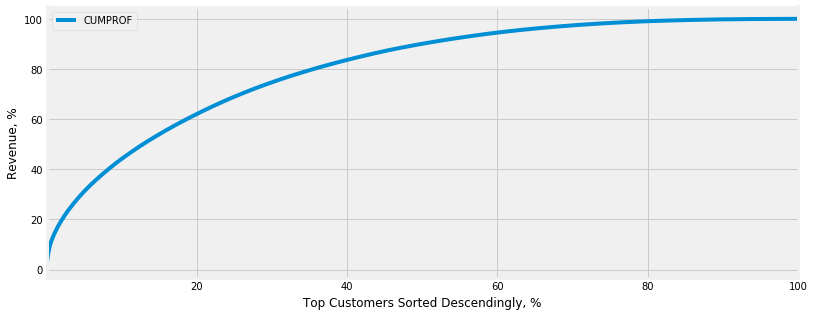

In [19]:
cumprof.plot(figsize=(12,5))
plt.xlabel('Top Customers Sorted Descendingly, %')
plt.ylabel('Revenue, %')

**Filter 1500 top customers**

In [20]:
top1500index=df.groupby('CUST_CODE').sum().sort_values('TOTAL_PRICE',ascending=False).iloc[:1500,:].index

**How much is the repeat rate, and churn rate?**

In [21]:
##of customer who purchased atleast two different times
repeat=sum(df.groupby(['CUST_CODE','SHOP_DATE']).count()['SHOP_WEEK'].unstack().apply(lambda x: x.count(), axis=1)>1) 

In [22]:
repeat_rate=repeat/df['CUST_CODE'].nunique()

In [23]:
#daily retention rate
repeat_rate*100

76.00913937547601

In [24]:
# daily churn rate
churn=1-repeat_rate

In [25]:
churn*100

23.99086062452399

Text(0.5, 0, '# of purchase repetition')

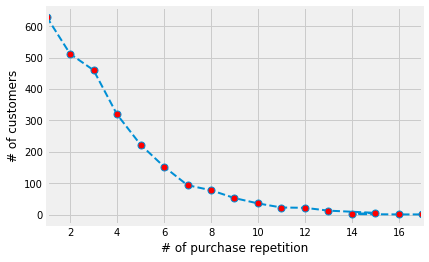

In [26]:
df.groupby(['CUST_CODE','SHOP_DATE']).count()['SHOP_WEEK'].unstack().apply(lambda x: x.count(), 
                    axis=1).value_counts().plot(marker='o', linestyle='--', linewidth=2, 
                    markersize=7, mfc='red')
plt.ylabel('# of customers')
plt.xlabel('# of purchase repetition')

In [27]:
REPEAT=pd.DataFrame(df.groupby(['CUST_CODE','SHOP_DATE']).count()['SHOP_WEEK'].unstack().apply(lambda x: x.count(),axis=1), columns=['REPEAT'])

**We filter the customers with more than 1 purchases**

In [28]:
repindex=REPEAT[REPEAT['REPEAT']>1].index

**We create a dataframe including only those customers with more than 1 purchase and in the list of top 1500 members. This is to capture both frequency and monetary. Three elements of CLTV are: Frequency, monetary, and recency, however, the total period within which data is available is limitted to 3 consecutive weeks only and we can not take recency into account.** 

In [29]:
filtered_indeces=np.intersect1d(np.array(repindex), np.array(top1500index))

In [30]:
filtered_indeces.shape # we have 1355 customers with more than one purchase who are also in the 1500-top-customers list.

(1355,)

In [31]:
top_customers=df[df['CUST_CODE'].apply(lambda x: x in list(filtered_indeces))]

In [32]:
top_customers.head(3)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,TOTAL_PRICE,MONTH,DAY
3,200801,2008-02-28,5,19,3,3.42,PRD0901465,CL00005,DEP00002,G00001,...,M,UM,Small Shop,Fresh,STORE00001,LS,E02,10.26,2,28
5,200801,2008-02-25,2,17,1,0.19,PRD0903052,CL00031,DEP00008,G00004,...,S,UM,Small Shop,Fresh,STORE00001,LS,E02,0.19,2,25
12,200801,2008-02-28,5,19,1,2.65,PRD0904036,CL00198,DEP00067,G00021,...,M,UM,Small Shop,Fresh,STORE00001,LS,E02,2.65,2,28


### What is the contribution of different parameters (below) in total_price earned from top customers purchases
* BASKET_PRICE_SENSITIVITY
* PROD_CODE
* BASKET_SIZE
* BASKET_TYPE
* BASKET_DOMINANT_MISSION
* STORE_FORMAT
* STORE_REGION

In [70]:
top_customers.groupby('BASKET_PRICE_SENSITIVITY').sum()

,SHOP_WEEK,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID,TOTAL_PRICE,MONTH,DAY
BASKET_PRICE_SENSITIVITY,,,,,,,,,
LA,2.066052e+09,40706.0,151261.0,17163.0,18836.31,1.022840e+19,44971.59,28506.0,131504.0
MM,5.898559e+09,117367.0,430475.0,47867.0,59586.18,2.920198e+19,130970.78,80992.0,383510.0
UM,2.708819e+09,54451.0,196693.0,21513.0,29058.14,1.341054e+19,61616.08,37340.0,172746.0
XX,3.032111e+07,610.0,1989.0,333.0,364.29,1.501106e+17,590.05,426.0,1803.0


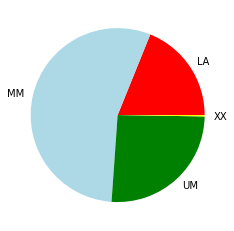

In [71]:
plt.pie(x=top_customers.groupby('BASKET_PRICE_SENSITIVITY').sum()['TOTAL_PRICE'], labels=['LA','MM','UM','XX'],colors=['red','lightblue', 'green','yellow'] )
plt.show()

**What are the top 30 most frequently purchased items?**

Text(0.5, 0, 'Product Code')

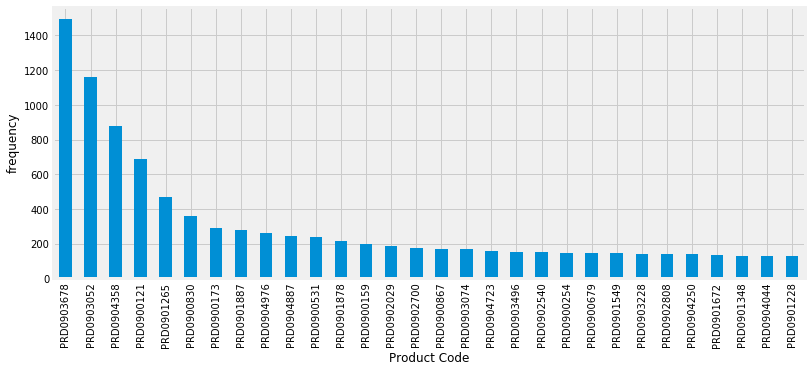

In [72]:
top_customers['PROD_CODE'].value_counts().head(30).plot.bar(figsize=(12,5))
plt.ylabel('frequency')
plt.xlabel('Product Code')

**What are those stores with most purchase**

Text(0.5, 0, 'Store Region')

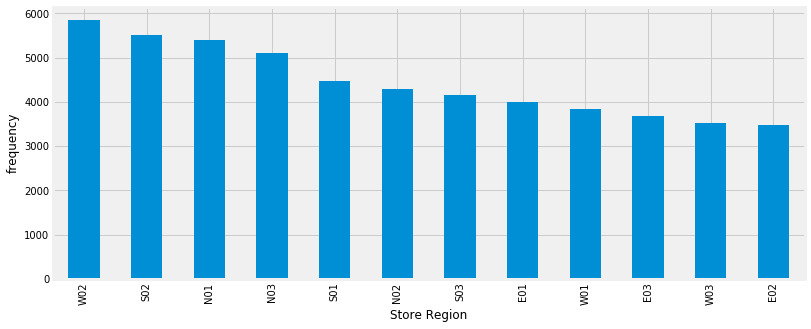

In [73]:
top_customers['STORE_REGION'].value_counts().head(30).plot.bar(figsize=(12,5))
plt.ylabel('frequency')
plt.xlabel('Store Region')

**What are stores with most purchase value**

Text(0.5, 0, 'Store Region')

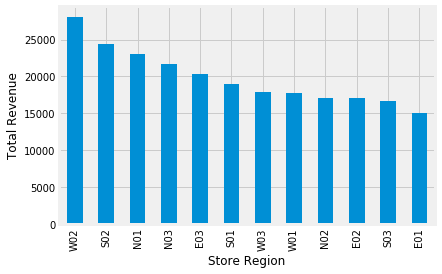

In [74]:
top_customers.groupby('STORE_REGION').sum()['TOTAL_PRICE'].sort_values(ascending=False).plot.bar()
plt.ylabel('Total Revenue')
plt.xlabel('Store Region')

**Are those stores with most purchases, also the ones produced higher revenue?**

*Answer: Yes for the first top four stores*

**Which store formats produced more revenue?**

Text(0.5, 0, 'Store Format')

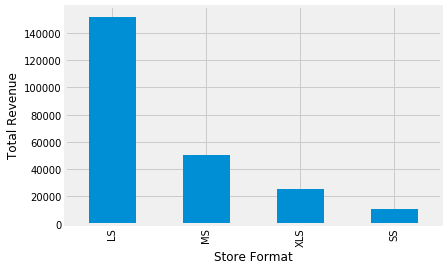

In [75]:
top_customers.groupby('STORE_FORMAT').sum()['TOTAL_PRICE'].sort_values(ascending=False).plot.bar()
plt.ylabel('Total Revenue')
plt.xlabel('Store Format')

**What are BASKET_DOMINANT_MISSIONs from which most revenue is generated?**

Text(0.5, 0, 'BASKET_DOMINANT_MISSION')

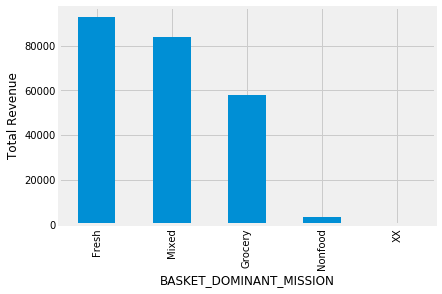

In [76]:
top_customers.groupby('BASKET_DOMINANT_MISSION').sum()['TOTAL_PRICE'].sort_values(ascending=False).plot.bar()
plt.ylabel('Total Revenue')
plt.xlabel('BASKET_DOMINANT_MISSION')

**What is the purchase distribution of different BASKET_DOMINANT_MISSIONs in stores with different formats?**

C:\Users\Mehdi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


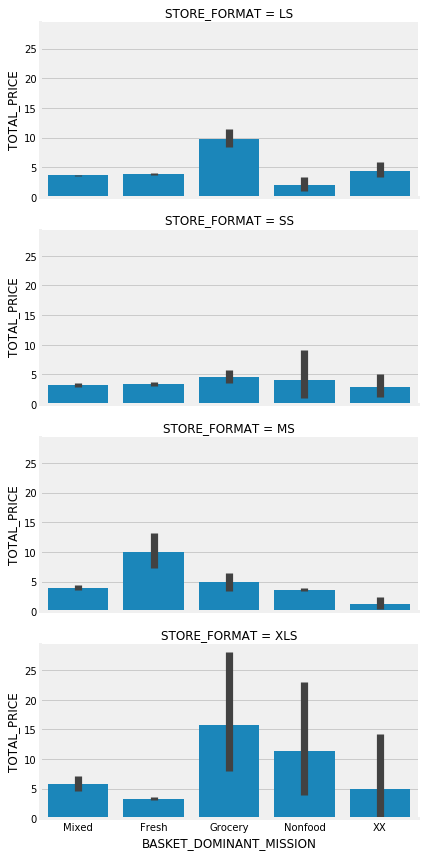

In [77]:
g=sns.FacetGrid(row='STORE_FORMAT', data=top_customers, aspect=2, height=3)
g.map(sns.barplot, 'BASKET_DOMINANT_MISSION', 'TOTAL_PRICE')
plt.tight_layout()

**What is the relationship between customer lifestage and total revenue produced from customer?** 

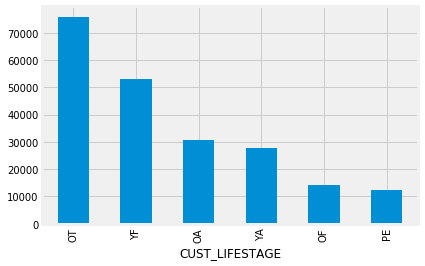

In [78]:
top_customers.groupby('CUST_LIFESTAGE').sum()['TOTAL_PRICE'].sort_values(ascending=False).plot.bar()

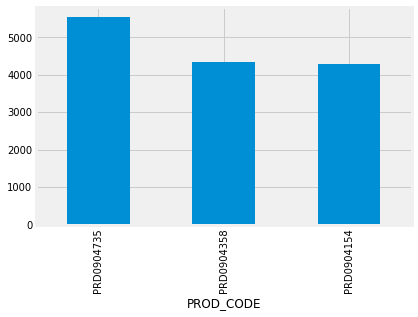

In [86]:
top_customers.groupby('PROD_CODE').sum()['TOTAL_PRICE'].sort_values(ascending=False).head(3).plot.bar()

**Creating Cohort Table**

In [35]:
def InvoiceMonth(x): return dt.datetime(x.year, x.month, 1)

In [224]:
df['InvoiceDate']=df['SHOP_DATE'].apply(InvoiceMonth)

In [225]:
df['CohortDate'] = df.groupby('CUST_CODE')['InvoiceDate'].transform('min')

**Define a function to extract year, month, and day**

In [67]:
def get_ymd (df, column):
    day=df[column].dt.day
    month=df[column].dt.month
    year=df[column].dt.year
    week=df[column].dt.week
    return year, month, week, day

In [226]:
invoice_year,invoice_month,invoice_week, _ = get_ymd(df,'InvoiceDate')

In [227]:
cohort_year,cohort_month,cohort_week, _ = get_ymd(df,'CohortDate')

**Build an offset value**

In [228]:
years_diff = invoice_year - cohort_year 
months_diff = invoice_month - cohort_month 
day_diff = invoice_day -cohort_day
week_diff=invoice_week - cohort_week

In [229]:
df['Cohort_Index']= week_diff+1

In [230]:
df['Cohort_Index'].nunique()

2

In [231]:
df.head(3)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,TOTAL_PRICE,MONTH,DAY,InvoiceDate,CohortDate,Cohort_Index
0,200801,2008-02-27,4,21,1,1.83,PRD0900159,CL00029,DEP00008,G00004,...,Fresh,STORE00001,LS,E02,1.83,2,27,2008-02-01,2008-02-01,1.0
1,200801,2008-02-27,4,21,1,0.86,PRD0900531,CL00026,DEP00008,G00004,...,Fresh,STORE00001,LS,E02,0.86,2,27,2008-02-01,2008-02-01,1.0
2,200801,2008-02-26,3,16,1,1.12,PRD0900925,CL00035,DEP00009,G00004,...,Fresh,STORE00001,LS,E02,1.12,2,26,2008-02-01,NaT,NaN


In [232]:
df.groupby(['InvoiceDate', 'CohortDate']).count()

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  \
InvoiceDate CohortDate                                                  
2008-02-01  2008-02-01      15520      15520         15520      15520   
2008-03-01  2008-02-01      32143      32143         32143      32143   
            2008-03-01      17321      17321         17321      17321   

                        QUANTITY  SPEND  PROD_CODE  PROD_CODE_10  \
InvoiceDate CohortDate                                             
2008-02-01  2008-02-01     15520  15520      15520         15520   
2008-03-01  2008-02-01     32143  32143      32143         32143   
            2008-03-01     17321  17321      17321         17321   

                        PROD_CODE_20  PROD_CODE_30  ...  \
InvoiceDate CohortDate                              ...   
2008-02-01  2008-02-01         15520         15520  ...   
2008-03-01  2008-02-01         32143         32143  ...   
            2008-03-01         17321         17321  ...   

                        BASKET_PRICE_SENSITIVITY  BASKET_TYPE  \
InvoiceDate CohortDate                                          
2008-02-01  2008-02-01                     15520        15520   
2008-03-01  2008-02-01                     32143        32143   
            2008-03-01                     17321        17321   

                        BASKET_DOMINANT_MISSION  STORE_CODE  STORE_FORMAT  \
InvoiceDate CohortDate                                                      
2008-02-01  2008-02-01                    15520       15520         15520   
2008-03-01  2008-02-01                    32143       32143         32143   
            2008-03-01                    17321       17321         17321   

                        STORE_REGION  TOTAL_PRICE  MONTH    DAY  Cohort_Index  
InvoiceDate CohortDate                                                         
2008-02-01  2008-02-01         15520        15520  15520  15520         15520  
2008-03-01  2008-02-01         32143        32143  32143  32143         32143  
            2008-03-01         17321        17321  17321  17321         17321  

[3 rows x 26 columns]

**From above analysis we have only two unique outcomes for cohort_index due to data limited to three weeks only, therefore, it looks better to define cohort on a weekly basis rather than monthly**

In [233]:
df['invoice_week']= df['SHOP_DATE'].dt.week

In [234]:
df['cohort_week']= df.groupby('CUST_CODE')['invoice_week'].transform(min)

In [235]:
df['Cohort_Index'] = df['invoice_week']-df['cohort_week']+1

In [149]:
top_customers.groupby(['invoice_week', 'cohort_week']).count()

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  \
invoice_week cohort_week                                                  
9            9                17721      17721         17721      17721   
10           9                15183      15183         15183      15183   
             10                2436       2436          2436       2436   
11           9                15686      15686         15686      15686   
             10                1974       1974          1974       1974   
             11                 305        305           305        305   

                          QUANTITY  SPEND  PROD_CODE  PROD_CODE_10  \
invoice_week cohort_week                                             
9            9               17721  17721      17721         17721   
10           9               15183  15183      15183         15183   
             10               2436   2436       2436          2436   
11           9               15686  15686      15686         15686   
             10               1974   1974       1974          1974   
             11                305    305        305           305   

                          PROD_CODE_20  PROD_CODE_30  ...  \
invoice_week cohort_week                              ...   
9            9                   17721         17721  ...   
10           9                   15183         15183  ...   
             10                   2436          2436  ...   
11           9                   15686         15686  ...   
             10                   1974          1974  ...   
             11                    305           305  ...   

                          BASKET_DOMINANT_MISSION  STORE_CODE  STORE_FORMAT  \
invoice_week cohort_week                                                      
9            9                              17721       17721         17721   
10           9                              15183       15183         15183   
             10                              2436        2436          2436   
11           9                              15686       15686         15686   
             10                              1974        1974          1974   
             11                               305         305           305   

                          STORE_REGION  TOTAL_PRICE  MONTH    DAY  \
invoice_week cohort_week                                            
9            9                   17721        17721  17721  17721   
10           9                   15183        15183  15183  15183   
             10                   2436         2436   2436   2436   
11           9                   15686        15686  15686  15686   
             10                   1974         1974   1974   1974   
             11                    305          305    305    305   

                          InvoiceDate  CohortDate  Cohort_Index  
invoice_week cohort_week                                         
9            9                  17721       17721         17721  
10           9                  15183       15183         15183  
             10                  2436        2436          2436  
11           9                  15686       15686         15686  
             10                  1974        1974          1974  
             11                   305         305           305  

[6 rows x 28 columns]

In [236]:
cohort_data=df.groupby(['CohortDate', 'Cohort_Index'])['CUST_CODE'].nunique()

In [237]:
cohort_data = cohort_data.reset_index()

**And, finally this would the company retention: Cohort Table**

In [238]:
cohort_table=cohort_data.pivot_table(index='CohortDate', columns='Cohort_Index', values='CUST_CODE', margins=True, aggfunc='sum')

In [240]:
cohort_table

Cohort_Index,1.0,2.0,3.0,All
CohortDate,,,,
2008-02-01 00:00:00,1535,1144,1147,3826
2008-03-01 00:00:00,1091,466,220,1777
All,2626,1610,1367,5603


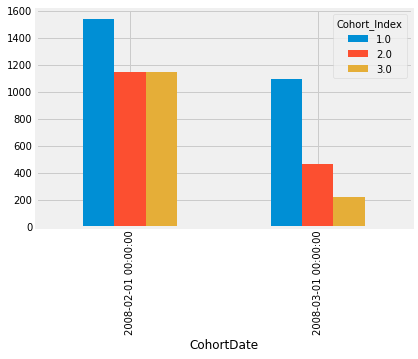

In [241]:
##Customer return plot
cohort_table.iloc[:2,:3].plot.bar()

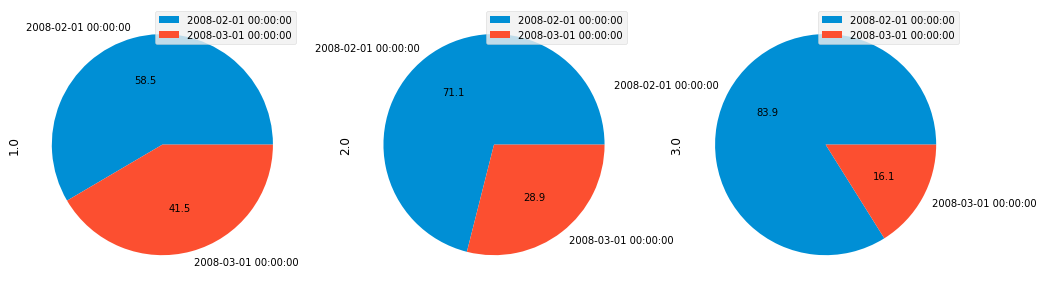

In [242]:
cohort_table.iloc[:2,:3].plot(kind='pie', subplots=True, autopct='%.1f', figsize=(15,15))
plt.show()

**Calculate the weekly retention table**

*Hint: If data is plenty, this table will be created for the monthly basis*

*1. Find the cohort size*

In [250]:
size = cohort_table.iloc[:2,0]

*2. Calculate Retention Rate*

In [360]:
retention_table = cohort_table.iloc[:2,:3].divide(size, axis=0).round(3)

In [361]:
retention_table

Cohort_Index,1.0,2.0,3.0
CohortDate,,,
2008-02-01 00:00:00,1.0,0.745,0.747
2008-03-01 00:00:00,1.0,0.427,0.202


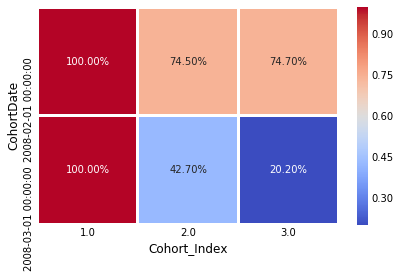

In [364]:
sns.heatmap(retention_table, cmap='coolwarm',annot=True,linewidths=2,fmt='.2%')

**Revenue Metrics**

In [319]:
rev_shop_date = df.groupby(['SHOP_DATE', 'Cohort_Index'])['TOTAL_PRICE'].sum().unstack()

In [320]:
rev_shop_date.head(10)

Cohort_Index,1.0,2.0,3.0
SHOP_DATE,,,
2008-02-25,10469.33,NaN,NaN
2008-02-26,13287.48,NaN,NaN
2008-02-27,10913.07,NaN,NaN
2008-02-28,12969.91,NaN,NaN
2008-02-29,11675.11,NaN,NaN
2008-03-01,12202.25,NaN,NaN
2008-03-02,14116.43,NaN,NaN
2008-03-03,1697.66,9084.08,NaN
2008-03-04,2933.83,8881.44,NaN


Text(0, 0.5, 'Revenue, $')

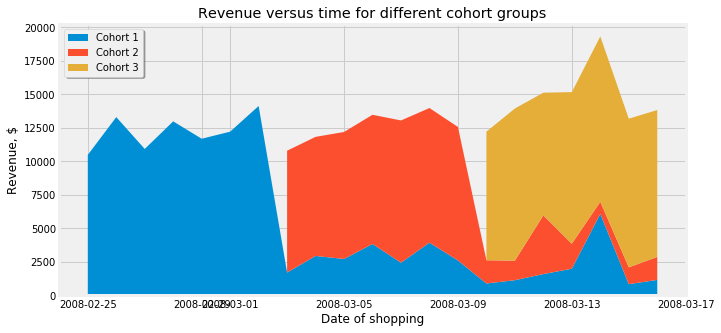

In [359]:
plt.figure(figsize=(10,5))
plt.stackplot(rev_shop_date.index, rev_shop_date[1], rev_shop_date[2], rev_shop_date[3], 
              labels=('Cohort 1', 'Cohort 2', 'Cohort 3'))
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), shadow=True)
plt.title('Revenue versus time for different cohort groups')
plt.xlabel('Date of shopping')
plt.ylabel('Revenue, $')

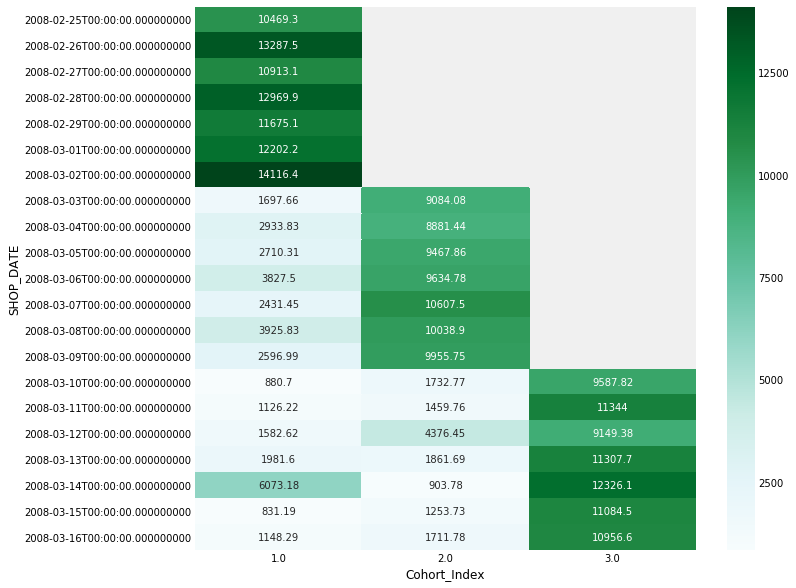

In [370]:
plt.figure(figsize=(10,10))
sns.heatmap(rev_shop_date, cmap='BuGn', fmt='2g', annot=True)

## Summary

A small sample data for a grocery retailer is provided to run explanatory analysis and get insights for the second phase of project which aims to ultimately improve CLTV and increase Shared Wallet. Data is limited to three weeks with almost 81000 row and 26 columns. The objective of this phase of study was to run Explanatory Data Analysis and realize the potential fields for company to make more revenue, to recognize the most profitable customers for company to provide incentives and improve membership packages, and to monitor the company’s overall performance whether they are capable to stablishing more branches national wide or not? Feature selection and feature engineering, build the predictive models, and product/customer segmentation are the main target of next phases of the projects (phase II and phase III). 
Following insights and understanding of data is listed below:
1.	Total revenue shows an increasing trend within the given three weeks with the total amount of  $ 350,850 which shows there might be a good potential to grow.
2.	80% of revenue is made from almost 36% of customers.
3.	CLTV is estimated as a function of total revenue and frequency of purchase. Recency as another influential parameter in this calculation is ignored because the data timeframe is not big enough to capture this feature. 
4.	Customer Retention and churn rate has been calculated on the daily basis to be 76% and 24% respectively. This means more than 600 customers out of 2626 registered customers have purchased only once. 
5.	Top-1500 customers from whom approximately 92% of company revenue is created, are filtered for more exploration.
6.	Company revenue relationship with features such as different basket prices, product categories, basket types, store formats and store regions has been determined.
7.	Company is more successful in selling fresh foods as almost 45% of total revenue made from it. Only a small portion of revenue made through selling nonfood items. 
8.	Cohort table has been created to show the retention rate for each invoice period. In general, retention rate looks satisfactory although three weeks of data cannot be a firm representative to make such conclusion. 
9.	This study is deemed successful in terms of getting an overall insight about company’s revenue, it’s potential to grow and to recognize the main key drives of CLTV to be used for next phase of the study and for company to focus on appropriate tactics to increase sale.
10.	It is part of the plan to run the same analysis on full set of data prior to move toward prediction phase. 



## End of Document